In [1]:
cd /tf/astromer

/tf/astromer


In [54]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
import json
import os 


from core.classifier import get_lstm_attention, get_lstm_no_attention, predict
from core.data  import clf_records
from sklearn.metrics import confusion_matrix
from core.plots import plot_cm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def get_conf(path):
    conf_file = os.path.join(lstm_no_att_path, 'conf.json')
    with open(conf_file, 'r') as handle:
        conf = json.load(handle)
        return conf

def load_weights(model, weigths):
    weights_path = '{}/weights'.format(weigths)
    model.load_weights(weights_path)
    return model

In [13]:
lstm_no_att_path = './runs/clf'
lstm_att_path = './runs/clf_att'

In [20]:
conf_non_att = get_conf(lstm_no_att_path)
conf_att = get_conf(lstm_att_path)

In [24]:
lstm_att = get_lstm_attention(conf_att['units'], conf_att['num_classes'], conf_att['w'], conf_att['dropout'])
lstm_non_att = get_lstm_no_attention(conf_non_att['units'], conf_non_att['num_classes'], conf_non_att['max_obs'], conf_non_att['dropout'])

In [31]:
lstm_att     = load_weights(lstm_att, lstm_att_path)
lstm_non_att = load_weights(lstm_non_att, lstm_no_att_path)

In [34]:
test_batches = clf_records(os.path.join(conf_att['data'], 'test'),
                            256,
                            max_obs=conf_att['max_obs'])

In [44]:
att_results, y_true_att, y_pred_att = predict(lstm_att, test_batches)
non_att_results, y_true, y_pred = predict(lstm_non_att, test_batches)

test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:595: UserWarning: Input dict contained keys ['lcid', 'label'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:08,  2.60it/s]
test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:595: UserWarning: Input dict contained keys ['lcid', 'label'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:05,  3.80it/s]
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
cm_att = confusion_matrix(y_true_att, y_pred_att, normalize='true')
cm     = confusion_matrix(y_true, y_pred, normalize='true')

In [61]:
cls_names = pd.read_csv(os.path.join(conf_att['data'], 'objects.csv'))['label'].values

['Cep_0' 'Cep_1' 'EC' 'LPV' 'RRab' 'RRc']
['Cep_0' 'Cep_1' 'EC' 'LPV' 'RRab' 'RRc']


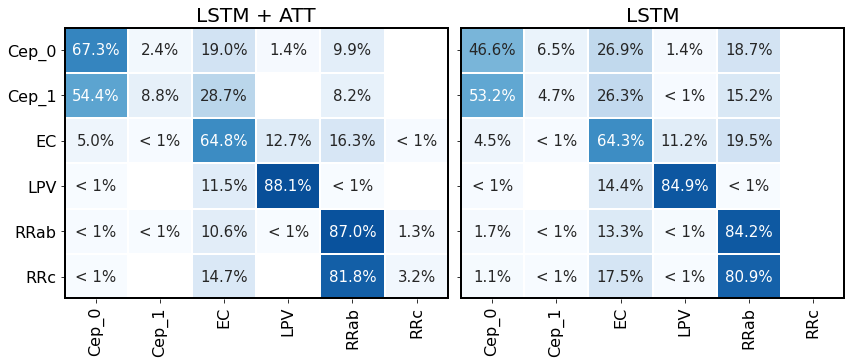

In [69]:
fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True, gridspec_kw={'hspace': 0., 'wspace': 0.03})

axes[0] = plot_cm(cm_att, axes[0], title='LSTM + ATT', class_names=cls_names)
axes[1] = plot_cm(cm, axes[1], title='LSTM', class_names=cls_names)